# Data Parsing

In [25]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random

dir_list = glob.glob("/special/jbpark/TabS6/*/")
dir_list

['/special/jbpark/TabS6/Seunghoon/',
 '/special/jbpark/TabS6/Jaeyun/',
 '/special/jbpark/TabS6/Eunyoung/',
 '/special/jbpark/TabS6/Daeyong/',
 '/special/jbpark/TabS6/Jaeho/',
 '/special/jbpark/TabS6/Shjeon/',
 '/special/jbpark/TabS6/Jiwon/',
 '/special/jbpark/TabS6/Joonbeom/',
 '/special/jbpark/TabS6/Jaehyun/',
 '/special/jbpark/TabS6/Junick/']

In [28]:
index = 9
df = pd.read_csv(dir_list[index]+"log.csv")
df

,count,gazeX,gazeY,pitch,roll,gyroX,gyroY,gyroZ,accelX,accelY,...,faceX,faceY,leftEyeleft,leftEyetop,leftEyeright,leftEyebottom,rightEyeleft,rightEyetop,rightEyeright,rightEyebottom
0,0,79,110,-45.681885,1.613797,-0.004106,0.000040,-0.006147,0.187937,6.859093,...,557.84686,1905.2860,918.29626,1906.0354,676.99750,1664.73660,549.60376,1908.2834,345.02440,1703.70410
1,1,79,110,-45.683560,1.576101,-0.005633,0.000346,-0.002176,0.187937,6.865078,...,557.84686,1907.1594,818.62940,1885.0529,619.29560,1685.71910,502.39313,1898.5416,313.55054,1709.69910
2,2,79,110,-45.679157,1.568650,0.005057,0.000346,0.000267,0.196316,6.883034,...,567.21405,1895.9188,814.88250,1885.0529,615.54870,1685.71910,494.14996,1895.9188,310.55310,1712.32190
3,3,79,110,-45.665524,1.523867,-0.002274,0.000651,0.000573,0.189134,6.857896,...,567.21405,1907.1594,810.38620,1884.3035,616.29816,1690.21530,494.14996,1905.2860,310.55310,1721.68910
4,4,79,110,-45.674274,1.498984,0.002002,0.000956,0.001184,0.196316,6.884231,...,572.83435,1907.1594,818.62940,1894.4200,619.29560,1695.08630,497.89685,1916.5266,314.29993,1732.92970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5066,5066,1199,1820,-12.401699,0.689726,0.003629,-0.000349,-0.000311,0.114917,9.643431,...,507.26404,811.1984,774.41626,825.4366,569.83685,620.85720,438.69623,826.9353,249.85364,638.09283
5067,5067,1199,1820,-12.397116,0.691932,-0.000647,0.000262,-0.000311,0.119705,9.650612,...,507.26404,811.1984,762.42630,819.0669,563.09247,619.73310,431.20245,826.9353,242.35999,638.09283
5068,5068,1199,1820,-12.395623,0.694465,0.003323,-0.000655,-0.000006,0.117311,9.644627,...,496.02344,811.1984,758.67940,819.0669,559.34560,619.73310,427.45563,826.9353,238.61304,638.09283
5069,5069,1199,1820,-12.388478,0.696826,-0.000342,0.000262,-0.000311,0.114917,9.662583,...,496.02344,811.1984,763.17566,825.4366,558.59625,620.85720,431.20245,834.4291,242.35999,645.58660


In [3]:
file_name = df["count"].tolist()
len(file_name)

leftEyeleft = df["leftEyeleft"].tolist()
leftEyetop = df["leftEyetop"].tolist()
rightEyeright = df["rightEyeright"].tolist()
rightEyebottom = df["rightEyebottom"].tolist()

In [4]:
rightEyebottom

[1672.605,
 1666.2354,
 1668.1088,
 1669.9823,
 1665.486,
 1667.3594,
 1671.1063,
 1667.3594,
 1671.8557,
 1672.9797,
 1731.431,
 1731.431,
 1731.431,
 1731.431,
 1732.1803,
 1735.9271,
 1741.5475,
 1742.6716,
 1742.6716,
 1743.4209,
 1513.3628,
 1520.8566,
 1518.9832,
 1511.4894,
 1508.8666,
 1520.1073,
 1532.4719,
 1534.3453,
 1535.0947,
 1542.2137,
 1530.2238,
 1530.2238,
 1530.2238,
 1530.2238,
 1534.7201,
 1539.5910000000001,
 1549.7075,
 1552.705,
 1558.3253,
 1562.0721,
 1511.8641,
 1508.1172,
 1506.2438,
 1506.2438,
 1506.2438,
 1506.9932,
 1508.8666,
 1512.6135,
 1516.3604,
 1512.6135,
 1559.0747,
 1558.3253,
 1560.1987,
 1556.4519,
 1556.4519,
 1559.0747,
 1559.0747,
 1559.0747,
 1556.4519,
 1556.4519,
 1562.0721,
 1559.4495,
 1559.4495,
 1562.0721,
 1561.3229,
 1561.3229,
 1561.3229,
 1561.3229,
 1561.3229,
 1561.3229,
 1551.2063,
 1551.2063,
 1551.2063,
 1556.8265,
 1554.9531,
 1556.0771,
 1554.2037,
 1557.9506,
 1566.1937,
 1564.3203,
 1575.5609,
 1577.4344,
 1577.4344,
 1

In [5]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random

left_eye = []
right_eye = []
gaze_point = []
left_eye_right_top = []
left_eye_left_bottom = []
right_eye_right_top = []
right_eye_left_bottom = []
euler = []
face_grid = []
left_eye_grid = []
right_eye_grid = []
facepos = []
image_type = "RGB"
basedir = '/special/jbpark/TabS6/'
target = 'Joonbeom/'

dir_name = basedir + target
df = pd.read_csv(dir_name+"log.csv")
file_name = df["count"].tolist()
im = Image.open(dir_name+"lefteye/"+str(file_name[0]).zfill(5)+".jpg").convert(image_type)
gazeX = df["gazeX"].tolist()
gazeY = df["gazeY"].tolist()
eulerX = df["eulerX"].tolist()
eulerY = df["eulerY"].tolist()
eulerZ = df["eulerZ"].tolist()
faceX = df["faceX"].tolist()
faceY = df["faceY"].tolist()
leftEyeleft = df["leftEyeleft"].tolist()
leftEyetop = df["leftEyetop"].tolist()
leftEyeright = df["leftEyeright"].tolist()
leftEyebottom = df["leftEyebottom"].tolist()
rightEyeleft = df["rightEyeleft"].tolist()
rightEyetop = df["rightEyetop"].tolist()
rightEyeright = df["rightEyeright"].tolist()
rightEyebottom = df["rightEyebottom"].tolist()

resolution=64

for i in range(len(file_name)):
    left_eye_image = np.asarray(Image.open(dir_name+"lefteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
    right_eye_image = np.asarray(Image.open(dir_name+"righteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
    left_eye.append(left_eye_image)
    right_eye.append(right_eye_image)
    facegrid = np.genfromtxt (dir_name+"facegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
    face_grid.append(facegrid)
    lefteyegrid = np.genfromtxt (dir_name+"lefteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
    left_eye_grid.append(lefteyegrid)
    righteyegrid = np.genfromtxt (dir_name+"righteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
    right_eye_grid.append(righteyegrid)

    gaze_point.append([float(gazeX[i]),float(gazeY[i])])
    euler.append([float(eulerX[i]), float(eulerY[i]), float(eulerZ[i])])
    facepos.append([float(faceX[i]), float(faceY[i])])
    left_eye_right_top.append([float(leftEyeright[i]), float(leftEyetop[i])])
    left_eye_left_bottom.append([float(leftEyeleft[i]), float(leftEyebottom[i])])
    right_eye_right_top.append([float(rightEyeright[i]), float(rightEyetop[i])])
    right_eye_left_bottom.append([float(rightEyeleft[i]), float(rightEyebottom[i])])
        
left_eye = np.asarray(left_eye)
right_eye = np.asarray(right_eye)
gaze_point = np.asarray(gaze_point)
face_grid = np.asarray(face_grid)
left_eye_grid = np.asarray(left_eye_grid)
right_eye_grid = np.asarray(right_eye_grid)
euler = np.asarray(euler)
facepos = np.asarray(facepos)
left_eye_right_top = np.asarray(left_eye_right_top)
left_eye_left_bottom = np.asarray(left_eye_left_bottom)
right_eye_right_top = np.asarray(right_eye_right_top)
right_eye_left_bottom = np.asarray(right_eye_left_bottom)

save_dir="/special/jbpark/TabS6Data/"+target
Path(save_dir).mkdir(parents=True, exist_ok=True)
             
#save to File
np.save(save_dir+"gaze_point.npy",gaze_point)
np.save(save_dir+"left_eye.npy",left_eye)
np.save(save_dir+"right_eye.npy",right_eye)
np.save(save_dir+"face_grid.npy",face_grid)
np.save(save_dir+"left_eye_grid.npy",left_eye_grid)
np.save(save_dir+"right_eye_grid.npy",right_eye_grid)
np.save(save_dir+"euler.npy",euler)
np.save(save_dir+"facepos.npy",facepos)
np.save(save_dir+"left_eye_right_top.npy",left_eye_right_top)
np.save(save_dir+"left_eye_left_bottom.npy",left_eye_left_bottom)
np.save(save_dir+"right_eye_right_top.npy",right_eye_right_top)
np.save(save_dir+"right_eye_left_bottom.npy",right_eye_left_bottom)

In [6]:
left_eye_right_top

array([[ 736.1981 , 2006.077  ],
       [ 739.945  , 2006.077  ],
       [ 747.4388 , 2007.9504 ],
       ...,
       [ 814.8825 ,  915.73627],
       [ 819.3788 ,  913.11346],
       [ 819.3788 ,  913.11346]])

In [7]:
print(right_eye_grid.shape)
print(left_eye_grid.shape)
print(face_grid.shape)
print(facepos.shape)
print(left_eye_right_top.shape)

(5043, 50, 50)
(5043, 50, 50)
(5043, 25, 25)
(5043, 2)
(5043, 2)


In [8]:
split_length = int(len(gaze_point)*0.9)
target_list = []
for i in range(len(gaze_point)):
    target_list.append([
        left_eye[i], right_eye[i], gaze_point[i], euler[i],
        face_grid[i], left_eye_grid[i], right_eye_grid[i], facepos[i],
        left_eye_right_top[i], left_eye_left_bottom[i], right_eye_right_top[i], right_eye_left_bottom[i]
    ])

random.shuffle(target_list)

train_data = target_list[:split_length]
test_data = target_list[split_length:]
np_train_data = np.asarray(train_data)
np_test_data = np.asarray(test_data)

train_left_eye_list=[]
train_right_eye_list=[]
train_gaze_point_list=[]
train_euler_list=[]
train_face_grid=[]
train_left_eye_grid=[]
train_right_eye_grid=[]
train_facepos=[]
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []

for i in range(len(np_train_data)):
    train_left_eye_list.append(np_train_data[i][0])
    train_right_eye_list.append(np_train_data[i][1])
    train_gaze_point_list.append(np_train_data[i][2])
    train_euler_list.append(np_train_data[i][3])
    train_face_grid.append(np_train_data[i][4])
    train_left_eye_grid.append(np_train_data[i][5])
    train_right_eye_grid.append(np_train_data[i][6])
    train_facepos.append(np_train_data[i][7])
    train_left_eye_right_top.append(np_train_data[i][8])
    train_left_eye_left_bottom.append(np_train_data[i][9])
    train_right_eye_right_top.append(np_train_data[i][10])
    train_right_eye_left_bottom.append(np_train_data[i][11])
    
test_left_eye_list=[]
test_right_eye_list=[]
test_gaze_point_list=[]
test_euler_list=[]
test_face_grid=[]
test_left_eye_grid=[]
test_right_eye_grid=[]
test_facepos=[]
test_left_eye_right_top = []
test_left_eye_left_bottom = []
test_right_eye_right_top = []
test_right_eye_left_bottom = []

for i in range(len(np_test_data)):
    test_left_eye_list.append(np_test_data[i][0])
    test_right_eye_list.append(np_test_data[i][1])
    test_gaze_point_list.append(np_test_data[i][2])
    test_euler_list.append(np_test_data[i][3])
    test_face_grid.append(np_test_data[i][4])
    test_left_eye_grid.append(np_test_data[i][5])
    test_right_eye_grid.append(np_test_data[i][6])
    test_facepos.append(np_test_data[i][7])
    test_left_eye_right_top.append(np_test_data[i][8])
    test_left_eye_left_bottom.append(np_test_data[i][9])
    test_right_eye_right_top.append(np_test_data[i][10])
    test_right_eye_left_bottom.append(np_test_data[i][11])

np_train_gaze_point_list = np.asarray(train_gaze_point_list)
np_train_right_eye_list = np.asarray(train_right_eye_list)
np_train_left_eye_list = np.asarray(train_left_eye_list)
np_train_euler_list = np.asarray(train_euler_list)
np_train_face_grid = np.asarray(train_face_grid)
np_train_left_eye_grid = np.asarray(train_left_eye_grid)
np_train_right_eye_grid = np.asarray(train_right_eye_grid)
np_train_facepos = np.asarray(train_facepos)
np_train_left_eye_right_top = np.asarray(train_left_eye_right_top)
np_train_left_eye_left_bottom = np.asarray(train_left_eye_left_bottom)
np_train_right_eye_right_top = np.asarray(train_right_eye_right_top)
np_train_right_eye_left_bottom = np.asarray(train_right_eye_left_bottom)

np_test_gaze_point_list = np.asarray(test_gaze_point_list)
np_test_right_eye_list = np.asarray(test_right_eye_list)
np_test_left_eye_list = np.asarray(test_left_eye_list)
np_test_euler_list = np.asarray(test_euler_list)
np_test_face_grid = np.asarray(test_face_grid)
np_test_left_eye_grid = np.asarray(test_left_eye_grid)
np_test_right_eye_grid = np.asarray(test_right_eye_grid)
np_test_facepos = np.asarray(test_facepos)
np_test_left_eye_right_top = np.asarray(test_left_eye_right_top)
np_test_left_eye_left_bottom = np.asarray(test_left_eye_left_bottom)
np_test_right_eye_right_top = np.asarray(test_right_eye_right_top)
np_test_right_eye_left_bottom = np.asarray(test_right_eye_left_bottom)

train_dir="/special/jbpark/TabS6Data/"+target+"train_dataset/"
Path(train_dir).mkdir(parents=True, exist_ok=True)
test_dir="/special/jbpark/TabS6Data/"+target+"test_dataset/"
Path(test_dir).mkdir(parents=True, exist_ok=True)

np.save(train_dir+"gaze_point.npy",np_train_gaze_point_list)
np.save(train_dir+"left_eye.npy",np_train_left_eye_list)
np.save(train_dir+"right_eye.npy",np_train_right_eye_list)
np.save(train_dir+"euler.npy",np_train_euler_list)
np.save(train_dir+"face_grid.npy",np_train_face_grid)
np.save(train_dir+"left_eye_grid.npy",np_train_left_eye_grid)
np.save(train_dir+"right_eye_grid.npy",np_train_right_eye_grid)
np.save(train_dir+"facepos.npy",np_train_facepos)
np.save(train_dir+"left_eye_right_top.npy",np_train_left_eye_right_top)
np.save(train_dir+"left_eye_left_bottom.npy",np_train_left_eye_left_bottom)
np.save(train_dir+"right_eye_right_top.npy",np_train_right_eye_right_top)
np.save(train_dir+"right_eye_left_bottom.npy",np_train_right_eye_left_bottom)


np.save(test_dir+"gaze_point.npy",np_test_gaze_point_list)
np.save(test_dir+"left_eye.npy",np_test_left_eye_list)
np.save(test_dir+"right_eye.npy",np_test_right_eye_list)
np.save(test_dir+"euler.npy",np_test_euler_list)
np.save(test_dir+"face_grid.npy",np_test_face_grid)
np.save(test_dir+"left_eye_grid.npy",np_test_left_eye_grid)
np.save(test_dir+"right_eye_grid.npy",np_test_right_eye_grid)
np.save(test_dir+"facepos.npy",np_test_facepos)
np.save(test_dir+"left_eye_right_top.npy",np_test_left_eye_right_top)
np.save(test_dir+"left_eye_left_bottom.npy",np_test_left_eye_left_bottom)
np.save(test_dir+"right_eye_right_top.npy",np_test_right_eye_right_top)
np.save(test_dir+"right_eye_left_bottom.npy",np_test_right_eye_left_bottom)

# Whole Data Generation

In [4]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random

dir_list = glob.glob("/special/jbpark/TabS6Data/*/")
dir_list

['/special/jbpark/TabS6Data/Seunghoon/',
 '/special/jbpark/TabS6Data/Jaeyun/',
 '/special/jbpark/TabS6Data/Eunyoung/',
 '/special/jbpark/TabS6Data/Daeyong/',
 '/special/jbpark/TabS6Data/Jaeho/',
 '/special/jbpark/TabS6Data/Shjeon/',
 '/special/jbpark/TabS6Data/Jiwon/',
 '/special/jbpark/TabS6Data/Jaehyun/',
 '/special/jbpark/TabS6Data/Junick/']

In [10]:
train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_face_grid = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []

for dir_name in dir_list:
    train_dir = dir_name+"train_dataset/"
    if dir_name == dir_list[0]:
        train_gaze_point = np.load(train_dir+"gaze_point.npy")
        train_left_eye = np.load(train_dir+"left_eye.npy")
        train_right_eye = np.load(train_dir+"right_eye.npy")
        train_euler = np.load(train_dir+"euler.npy")
        train_face_grid = np.load(train_dir+"face_grid.npy")
        train_left_eye_grid = np.load(train_dir+"left_eye_grid.npy")
        train_right_eye_grid = np.load(train_dir+"right_eye_grid.npy")
        train_facepos = np.load(train_dir+"facepos.npy")
        train_left_eye_right_top = np.load(train_dir+"left_eye_right_top.npy")
        train_left_eye_left_bottom = np.load(train_dir+"left_eye_left_bottom.npy")
        train_right_eye_right_top = np.load(train_dir+"right_eye_right_top.npy")
        train_right_eye_left_bottom = np.load(train_dir+"right_eye_left_bottom.npy")
    else: 
        train_gaze_point = np.concatenate((train_gaze_point,np.load(train_dir+"gaze_point.npy")),axis=0)
        train_left_eye = np.concatenate((train_left_eye,np.load(train_dir+"left_eye.npy")),axis=0)
        train_right_eye = np.concatenate((train_right_eye,np.load(train_dir+"right_eye.npy")),axis=0)
        train_euler = np.concatenate((train_euler,np.load(train_dir+"euler.npy")),axis=0)
        train_face_grid = np.concatenate((train_face_grid,np.load(train_dir+"face_grid.npy")),axis=0)
        train_left_eye_grid = np.concatenate((train_left_eye_grid,np.load(train_dir+"left_eye_grid.npy")),axis=0)
        train_right_eye_grid = np.concatenate((train_right_eye_grid,np.load(train_dir+"right_eye_grid.npy")),axis=0)
        train_facepos = np.concatenate((train_facepos,np.load(train_dir+"facepos.npy")),axis=0)
        train_left_eye_right_top = np.concatenate((train_left_eye_right_top,np.load(train_dir+"left_eye_right_top.npy")),axis=0)
        train_left_eye_left_bottom = np.concatenate((train_left_eye_left_bottom,np.load(train_dir+"left_eye_left_bottom.npy")),axis=0)
        train_right_eye_right_top = np.concatenate((train_right_eye_right_top,np.load(train_dir+"right_eye_right_top.npy")),axis=0)
        train_right_eye_left_bottom = np.concatenate((train_right_eye_left_bottom,np.load(train_dir+"right_eye_left_bottom.npy")),axis=0)
        
train_left_eye_right_top[:,0] = train_left_eye_right_top[:,0]/1348
train_left_eye_right_top[:,1] = train_left_eye_right_top[:,1]/2398

train_left_eye_left_bottom[:,0] = train_left_eye_left_bottom[:,0]/1348
train_left_eye_left_bottom[:,1] = train_left_eye_left_bottom[:,1]/2398

train_right_eye_right_top[:,0] = train_right_eye_right_top[:,0]/1348
train_right_eye_right_top[:,1] = train_right_eye_right_top[:,1]/2398

train_right_eye_left_bottom[:,0] = train_right_eye_left_bottom[:,0]/1348
train_right_eye_left_bottom[:,1] = train_right_eye_left_bottom[:,1]/2398

target_list = []
for i in range(len(train_gaze_point)):
    target_list.append([
        train_left_eye[i], train_right_eye[i], train_gaze_point[i], train_euler[i],
        train_face_grid[i], train_left_eye_grid[i], train_right_eye_grid[i], train_facepos[i],
        train_left_eye_right_top[i], train_left_eye_left_bottom[i], train_right_eye_right_top[i], train_right_eye_left_bottom[i]
    ])

random.shuffle(target_list)

train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_face_grid = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []

for i in range(len(target_list)):
    train_left_eye.append(target_list[i][0])
    train_right_eye.append(target_list[i][1])
    train_gaze_point.append(target_list[i][2])
    train_euler.append(target_list[i][3])
    train_face_grid.append(target_list[i][4])
    train_left_eye_grid.append(target_list[i][5])
    train_right_eye_grid.append(target_list[i][6])
    train_facepos.append(target_list[i][7])
    train_left_eye_right_top.append(target_list[i][8])
    train_left_eye_left_bottom.append(target_list[i][9])
    train_right_eye_right_top.append(target_list[i][10])
    train_right_eye_left_bottom.append(target_list[i][11])
    
train_gaze_point = np.asarray(train_gaze_point)
train_right_eye = np.asarray(train_right_eye)
train_left_eye = np.asarray(train_left_eye)
train_euler = np.asarray(train_euler)
train_face_grid = np.asarray(train_face_grid)
train_left_eye_grid = np.asarray(train_left_eye_grid)
train_right_eye_grid = np.asarray(train_right_eye_grid)
train_facepos = np.asarray(train_facepos)
train_left_eye_right_top = np.asarray(train_left_eye_right_top)
train_left_eye_left_bottom = np.asarray(train_left_eye_left_bottom)
train_right_eye_right_top = np.asarray(train_right_eye_right_top)
train_right_eye_left_bottom = np.asarray(train_right_eye_left_bottom)

train_dir="/special/jbpark/TabS6WholeData/train_dataset/"
Path(train_dir).mkdir(parents=True, exist_ok=True)
np.save(train_dir+"gaze_point.npy",train_gaze_point)
np.save(train_dir+"left_eye.npy",train_left_eye)
np.save(train_dir+"right_eye.npy",train_right_eye)
np.save(train_dir+"euler.npy",train_euler)
np.save(train_dir+"face_grid.npy",train_face_grid)
np.save(train_dir+"left_eye_grid.npy",train_left_eye_grid)
np.save(train_dir+"right_eye_grid.npy",train_right_eye_grid)
np.save(train_dir+"facepos.npy",train_facepos)
np.save(train_dir+"left_eye_right_top.npy",train_left_eye_right_top)
np.save(train_dir+"left_eye_left_bottom.npy",train_left_eye_left_bottom)
np.save(train_dir+"right_eye_right_top.npy",train_right_eye_right_top)
np.save(train_dir+"right_eye_left_bottom.npy",train_right_eye_left_bottom)

In [11]:
train_right_eye.shape

(41395, 64, 64)

In [12]:
train_left_eye_right_top

array([[0.66399525, 0.5046875 ],
       [0.65009736, 0.409375  ],
       [0.57616051, 0.65015626],
       ...,
       [0.40104688, 0.70484374],
       [0.50222366, 0.5675    ],
       [0.64231452, 0.71453123]])

# RGB Data

In [1]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random

dir_list = glob.glob("/special/jbpark/TabS6/*/")
dir_list

['/special/jbpark/TabS6/Seunghoon/',
 '/special/jbpark/TabS6/Jaeyun/',
 '/special/jbpark/TabS6/Eunyoung/',
 '/special/jbpark/TabS6/Hakjun/',
 '/special/jbpark/TabS6/Daeyong/',
 '/special/jbpark/TabS6/Jaeho/',
 '/special/jbpark/TabS6/Shjeon/',
 '/special/jbpark/TabS6/Jiwon/',
 '/special/jbpark/TabS6/Joonbeom/',
 '/special/jbpark/TabS6/Jaehyun/',
 '/special/jbpark/TabS6/Junick/']

In [1]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
import gc

for target in ['Jaeho/','Seunghoon/','Jaeyun/','Eunyoung/','Daeyong/','Shjeon/','Jiwon/','Jaehyun/','Junick/']:
    print(target)
    left_eye = []
    right_eye = []
    left_eye_224 = []
    right_eye_224 = []
    gaze_point = []
    left_eye_right_top = []
    left_eye_left_bottom = []
    right_eye_right_top = []
    right_eye_left_bottom = []
    euler = []
    face_grid = []
    left_eye_grid = []
    right_eye_grid = []
    facepos = []
    face = []
    image_type = "L"
    basedir = '/special/jbpark/TabS6/'

    dir_name = basedir + target
    df = pd.read_csv(dir_name+"log.csv")
    file_name = df["count"].tolist()
    gazeX = df["gazeX"].tolist()
    gazeY = df["gazeY"].tolist()
    eulerX = df["eulerX"].tolist()
    eulerY = df["eulerY"].tolist()
    eulerZ = df["eulerZ"].tolist()
    faceX = df["faceX"].tolist()
    faceY = df["faceY"].tolist()
    leftEyeleft = df["leftEyeleft"].tolist()
    leftEyetop = df["leftEyetop"].tolist()
    leftEyeright = df["leftEyeright"].tolist()
    leftEyebottom = df["leftEyebottom"].tolist()
    rightEyeleft = df["rightEyeleft"].tolist()
    rightEyetop = df["rightEyetop"].tolist()
    rightEyeright = df["rightEyeright"].tolist()
    rightEyebottom = df["rightEyebottom"].tolist()

    resolution=64

    for i in range(len(file_name)):
        left_eye_image = np.asarray(Image.open(dir_name+"lefteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
        right_eye_image = np.asarray(Image.open(dir_name+"righteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
        left_eye.append(left_eye_image)
        right_eye.append(right_eye_image)
        
        # for iTracker
        face_image = np.asarray(Image.open(dir_name+"face/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((224,224)))/255
        face.append(face_image)
        left_eye_image_224 = np.asarray(Image.open(dir_name+"lefteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((224,224)))/255
        right_eye_image_224 = np.asarray(Image.open(dir_name+"righteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((224,224)))/255
        left_eye_224.append(left_eye_image_224)
        right_eye_224.append(right_eye_image_224)
        
        facegrid = np.genfromtxt (dir_name+"facegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        face_grid.append(facegrid)
        lefteyegrid = np.genfromtxt (dir_name+"lefteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        left_eye_grid.append(lefteyegrid)
        righteyegrid = np.genfromtxt (dir_name+"righteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        right_eye_grid.append(righteyegrid)

        gaze_point.append([float(gazeX[i]),float(gazeY[i])])
        euler.append([float(eulerX[i]), float(eulerY[i]), float(eulerZ[i])])
        facepos.append([float(faceX[i]), float(faceY[i])])
        left_eye_right_top.append([float(leftEyeright[i]), float(leftEyetop[i])])
        left_eye_left_bottom.append([float(leftEyeleft[i]), float(leftEyebottom[i])])
        right_eye_right_top.append([float(rightEyeright[i]), float(rightEyetop[i])])
        right_eye_left_bottom.append([float(rightEyeleft[i]), float(rightEyebottom[i])])

    left_eye = np.asarray(left_eye)
    right_eye = np.asarray(right_eye)
    left_eye_224 = np.asarray(left_eye_224)
    right_eye_224 = np.asarray(right_eye_224)
    face = np.asarray(face)
    gaze_point = np.asarray(gaze_point)
    face_grid = np.asarray(face_grid)
    left_eye_grid = np.asarray(left_eye_grid)
    right_eye_grid = np.asarray(right_eye_grid)
    euler = np.asarray(euler)
    facepos = np.asarray(facepos)
    left_eye_right_top = np.asarray(left_eye_right_top)
    left_eye_left_bottom = np.asarray(left_eye_left_bottom)
    right_eye_right_top = np.asarray(right_eye_right_top)
    right_eye_left_bottom = np.asarray(right_eye_left_bottom)

    save_dir="/special/jbpark/TabS6"+image_type+"Data/"+target
    Path(save_dir).mkdir(parents=True, exist_ok=True)

    #save to File
    np.save(save_dir+"gaze_point.npy",gaze_point)
    np.save(save_dir+"left_eye.npy",left_eye)
    np.save(save_dir+"right_eye.npy",right_eye)
    np.save(save_dir+"left_eye_224.npy",left_eye_224)
    np.save(save_dir+"right_eye_224.npy",right_eye_224)
    np.save(save_dir+"face_grid.npy",face_grid)
    np.save(save_dir+"face.npy",face)
    np.save(save_dir+"left_eye_grid.npy",left_eye_grid)
    np.save(save_dir+"right_eye_grid.npy",right_eye_grid)
    np.save(save_dir+"euler.npy",euler)
    np.save(save_dir+"facepos.npy",facepos)
    np.save(save_dir+"left_eye_right_top.npy",left_eye_right_top)
    np.save(save_dir+"left_eye_left_bottom.npy",left_eye_left_bottom)
    np.save(save_dir+"right_eye_right_top.npy",right_eye_right_top)
    np.save(save_dir+"right_eye_left_bottom.npy",right_eye_left_bottom)

Joonbeom/


In [2]:
print("Done")

Done


In [3]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
import gc

for target in ['Jaeho/','Seunghoon/','Jaeyun/','Eunyoung/','Daeyong/','Shjeon/','Jiwon/','Jaehyun/','Junick/','Hakjun/','Joonbeom/']:
    print(target)
    image_type = "RGB"
    save_dir="/special/jbpark/TabS6"+image_type+"Data/"+target
    
    gaze_point = np.load(save_dir+"gaze_point.npy")
    left_eye = np.load(save_dir+"left_eye.npy")
    right_eye = np.load(save_dir+"right_eye.npy")
    euler = np.load(save_dir+"euler.npy")
    face_grid = np.load(save_dir+"face_grid.npy")
    left_eye_grid = np.load(save_dir+"left_eye_grid.npy")
    right_eye_grid = np.load(save_dir+"right_eye_grid.npy")
    facepos = np.load(save_dir+"facepos.npy")
    left_eye_right_top = np.load(save_dir+"left_eye_right_top.npy")
    left_eye_left_bottom = np.load(save_dir+"left_eye_left_bottom.npy")
    right_eye_right_top = np.load(save_dir+"right_eye_right_top.npy")
    right_eye_left_bottom = np.load(save_dir+"right_eye_left_bottom.npy")
    right_eye_224 = np.load(save_dir+"right_eye_224.npy")
    left_eye_224 = np.load(save_dir+"left_eye_224.npy")
    face = np.load(save_dir+"face.npy")
    
    split_length = int(len(gaze_point)*0.9)
    target_list = []
    for i in range(len(gaze_point)):
        target_list.append([
            left_eye[i], right_eye[i], gaze_point[i], euler[i],
            face_grid[i], left_eye_grid[i], right_eye_grid[i], facepos[i],
            left_eye_right_top[i], left_eye_left_bottom[i], right_eye_right_top[i], right_eye_left_bottom[i],
            left_eye_224[i], right_eye_224[i], face[i]
        ])
        
    %xdel -n gaze_point
    %xdel -n face
    %xdel -n facepos
    %xdel -n left_eye
    %xdel -n right_eye
    %xdel -n left_eye_224
    %xdel -n right_eye_224
    %xdel -n face_grid
    %xdel -n euler
    %xdel -n left_eye_right_top
    %xdel -n left_eye_left_bottom
    %xdel -n right_eye_right_top
    %xdel -n right_eye_left_bottom
    
    random.shuffle(target_list)
    print("data shuffled")

    train_data = target_list[:split_length]
    test_data = target_list[split_length:]
    np_train_data = np.asarray(train_data)
    np_test_data = np.asarray(test_data)
    
    %xdel -n target_list
    %xdel -n train_data
    %xdel -n test_data

    train_left_eye_list=[]
    train_right_eye_list=[]
    train_gaze_point_list=[]
    train_euler_list=[]
    train_face_grid=[]
    train_left_eye_grid=[]
    train_right_eye_grid=[]
    train_facepos=[]
    train_left_eye_right_top = []
    train_left_eye_left_bottom = []
    train_right_eye_right_top = []
    train_right_eye_left_bottom = []
    train_left_eye_224_list=[]
    train_right_eye_224_list=[]
    train_face_list=[]
    
    print("train data append")

    for i in range(len(np_train_data)):
        train_left_eye_list.append(np_train_data[i][0])
        train_right_eye_list.append(np_train_data[i][1])
        train_gaze_point_list.append(np_train_data[i][2])
        train_euler_list.append(np_train_data[i][3])
        train_face_grid.append(np_train_data[i][4])
        train_left_eye_grid.append(np_train_data[i][5])
        train_right_eye_grid.append(np_train_data[i][6])
        train_facepos.append(np_train_data[i][7])
        train_left_eye_right_top.append(np_train_data[i][8])
        train_left_eye_left_bottom.append(np_train_data[i][9])
        train_right_eye_right_top.append(np_train_data[i][10])
        train_right_eye_left_bottom.append(np_train_data[i][11])
        train_left_eye_224_list.append(np_train_data[i][12])
        train_right_eye_224_list.append(np_train_data[i][13])
        train_face_list.append(np_train_data[i][14])

    test_left_eye_list=[]
    test_right_eye_list=[]
    test_gaze_point_list=[]
    test_euler_list=[]
    test_face_grid=[]
    test_left_eye_grid=[]
    test_right_eye_grid=[]
    test_facepos=[]
    test_left_eye_right_top = []
    test_left_eye_left_bottom = []
    test_right_eye_right_top = []
    test_right_eye_left_bottom = []
    test_left_eye_224_list=[]
    test_right_eye_224_list=[]
    test_face_list=[]

    print("test data append")
    
    for i in range(len(np_test_data)):
        test_left_eye_list.append(np_test_data[i][0])
        test_right_eye_list.append(np_test_data[i][1])
        test_gaze_point_list.append(np_test_data[i][2])
        test_euler_list.append(np_test_data[i][3])
        test_face_grid.append(np_test_data[i][4])
        test_left_eye_grid.append(np_test_data[i][5])
        test_right_eye_grid.append(np_test_data[i][6])
        test_facepos.append(np_test_data[i][7])
        test_left_eye_right_top.append(np_test_data[i][8])
        test_left_eye_left_bottom.append(np_test_data[i][9])
        test_right_eye_right_top.append(np_test_data[i][10])
        test_right_eye_left_bottom.append(np_test_data[i][11])
        test_left_eye_224_list.append(np_test_data[i][12])
        test_right_eye_224_list.append(np_test_data[i][13])
        test_face_list.append(np_test_data[i][14])

    print("train data to numpy")
    np_train_gaze_point_list = np.asarray(train_gaze_point_list)
    np_train_right_eye_list = np.asarray(train_right_eye_list)
    np_train_left_eye_list = np.asarray(train_left_eye_list)
    np_train_euler_list = np.asarray(train_euler_list)
    np_train_face_grid = np.asarray(train_face_grid)
    np_train_left_eye_grid = np.asarray(train_left_eye_grid)
    np_train_right_eye_grid = np.asarray(train_right_eye_grid)
    np_train_facepos = np.asarray(train_facepos)
    np_train_left_eye_right_top = np.asarray(train_left_eye_right_top)
    np_train_left_eye_left_bottom = np.asarray(train_left_eye_left_bottom)
    np_train_right_eye_right_top = np.asarray(train_right_eye_right_top)
    np_train_right_eye_left_bottom = np.asarray(train_right_eye_left_bottom)
    np_train_left_eye_224_list = np.asarray(train_left_eye_224_list)
    np_train_right_eye_224_list = np.asarray(train_right_eye_224_list)
    np_train_face_list = np.asarray(train_face_list)

    np_test_gaze_point_list = np.asarray(test_gaze_point_list)
    np_test_right_eye_list = np.asarray(test_right_eye_list)
    np_test_left_eye_list = np.asarray(test_left_eye_list)
    np_test_euler_list = np.asarray(test_euler_list)
    np_test_face_grid = np.asarray(test_face_grid)
    np_test_left_eye_grid = np.asarray(test_left_eye_grid)
    np_test_right_eye_grid = np.asarray(test_right_eye_grid)
    np_test_facepos = np.asarray(test_facepos)
    np_test_left_eye_right_top = np.asarray(test_left_eye_right_top)
    np_test_left_eye_left_bottom = np.asarray(test_left_eye_left_bottom)
    np_test_right_eye_right_top = np.asarray(test_right_eye_right_top)
    np_test_right_eye_left_bottom = np.asarray(test_right_eye_left_bottom)
    np_test_left_eye_224_list = np.asarray(test_left_eye_224_list)
    np_test_right_eye_224_list = np.asarray(test_right_eye_224_list)
    np_test_face_list = np.asarray(test_face_list)

    train_dir="/special/jbpark/TabS6"+image_type+"Data/"+target+"train_dataset/"
    Path(train_dir).mkdir(parents=True, exist_ok=True)
    test_dir="/special/jbpark/TabS6"+image_type+"Data/"+target+"test_dataset/"
    Path(test_dir).mkdir(parents=True, exist_ok=True)
    
    print("train data save")
    np.save(train_dir+"gaze_point.npy",np_train_gaze_point_list)
    np.save(train_dir+"left_eye.npy",np_train_left_eye_list)
    np.save(train_dir+"right_eye.npy",np_train_right_eye_list)
    np.save(train_dir+"euler.npy",np_train_euler_list)
    np.save(train_dir+"face_grid.npy",np_train_face_grid)
    np.save(train_dir+"left_eye_grid.npy",np_train_left_eye_grid)
    np.save(train_dir+"right_eye_grid.npy",np_train_right_eye_grid)
    np.save(train_dir+"facepos.npy",np_train_facepos)
    np.save(train_dir+"left_eye_right_top.npy",np_train_left_eye_right_top)
    np.save(train_dir+"left_eye_left_bottom.npy",np_train_left_eye_left_bottom)
    np.save(train_dir+"right_eye_right_top.npy",np_train_right_eye_right_top)
    np.save(train_dir+"right_eye_left_bottom.npy",np_train_right_eye_left_bottom)
    np.save(train_dir+"left_eye_224.npy",np_train_left_eye_224_list)
    np.save(train_dir+"right_eye_224.npy",np_train_right_eye_224_list)
    np.save(train_dir+"face.npy",np_train_face_list)
    print("train data saved")
    
    %xdel -n np_train_gaze_point_list
    %xdel -n np_train_left_eye_list
    %xdel -n np_train_right_eye_list
    %xdel -n np_train_euler_list
    %xdel -n np_train_face_grid
    %xdel -n np_train_left_eye_grid
    %xdel -n np_train_facepos
    %xdel -n np_train_right_eye_grid
    %xdel -n np_train_left_eye_right_top
    %xdel -n np_train_left_eye_left_bottom
    %xdel -n np_train_right_eye_right_top
    %xdel -n np_train_right_eye_left_bottom
    %xdel -n np_train_left_eye_224_list
    %xdel -n np_train_right_eye_224_list
    %xdel -n np_train_face_list

    print("test data save")
    np.save(test_dir+"gaze_point.npy",np_test_gaze_point_list)
    np.save(test_dir+"left_eye.npy",np_test_left_eye_list)
    np.save(test_dir+"right_eye.npy",np_test_right_eye_list)
    np.save(test_dir+"euler.npy",np_test_euler_list)
    np.save(test_dir+"face_grid.npy",np_test_face_grid)
    np.save(test_dir+"left_eye_grid.npy",np_test_left_eye_grid)
    np.save(test_dir+"right_eye_grid.npy",np_test_right_eye_grid)
    np.save(test_dir+"facepos.npy",np_test_facepos)
    np.save(test_dir+"left_eye_right_top.npy",np_test_left_eye_right_top)
    np.save(test_dir+"left_eye_left_bottom.npy",np_test_left_eye_left_bottom)
    np.save(test_dir+"right_eye_right_top.npy",np_test_right_eye_right_top)
    np.save(test_dir+"right_eye_left_bottom.npy",np_test_right_eye_left_bottom)
    np.save(test_dir+"left_eye_224.npy",np_test_left_eye_224_list)
    np.save(test_dir+"right_eye_224.npy",np_test_right_eye_224_list)
    np.save(test_dir+"face.npy",np_test_face_list)
    print("test data saved")
    
    %xdel -n np_test_gaze_point_list
    %xdel -n np_test_left_eye_list
    %xdel -n np_test_right_eye_list
    %xdel -n np_test_euler_list
    %xdel -n np_test_face_grid
    %xdel -n np_test_left_eye_grid
    %xdel -n np_test_facepos
    %xdel -n np_test_right_eye_grid
    %xdel -n np_test_left_eye_right_top
    %xdel -n np_test_left_eye_left_bottom
    %xdel -n np_test_right_eye_right_top
    %xdel -n np_test_right_eye_left_bottom
    %xdel -n np_test_left_eye_224_list
    %xdel -n np_test_right_eye_224_list
    %xdel -n np_test_face_list

Joonbeom/
data shuffled
train data append
test data append
train data to numpy


/lvmdata/jbpark/.anaconda3/envs/tensorflow20/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


train data save
train data saved
test data save
test data saved


In [1]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
image_type="RGB"

dir_list = glob.glob("/special/jbpark/TabS6"+image_type+"Data/*/")
dir_list

train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []

for dir_name in dir_list:
    train_dir = dir_name+"train_dataset/"
    print(dir_name)
    if dir_name == dir_list[0]:
        train_gaze_point = np.load(train_dir+"gaze_point.npy")
        train_left_eye = np.load(train_dir+"left_eye.npy")
        train_right_eye = np.load(train_dir+"right_eye.npy")
        train_euler = np.load(train_dir+"euler.npy")
        train_left_eye_grid = np.load(train_dir+"left_eye_grid.npy")
        train_right_eye_grid = np.load(train_dir+"right_eye_grid.npy")
        train_facepos = np.load(train_dir+"facepos.npy")
        train_left_eye_right_top = np.load(train_dir+"left_eye_right_top.npy")
        train_left_eye_left_bottom = np.load(train_dir+"left_eye_left_bottom.npy")
        train_right_eye_right_top = np.load(train_dir+"right_eye_right_top.npy")
        train_right_eye_left_bottom = np.load(train_dir+"right_eye_left_bottom.npy")
    else: 
        train_gaze_point = np.concatenate((train_gaze_point,np.load(train_dir+"gaze_point.npy")),axis=0)
        train_left_eye = np.concatenate((train_left_eye,np.load(train_dir+"left_eye.npy")),axis=0)
        train_right_eye = np.concatenate((train_right_eye,np.load(train_dir+"right_eye.npy")),axis=0)
        train_euler = np.concatenate((train_euler,np.load(train_dir+"euler.npy")),axis=0)
        train_left_eye_grid = np.concatenate((train_left_eye_grid,np.load(train_dir+"left_eye_grid.npy")),axis=0)
        train_right_eye_grid = np.concatenate((train_right_eye_grid,np.load(train_dir+"right_eye_grid.npy")),axis=0)
        train_facepos = np.concatenate((train_facepos,np.load(train_dir+"facepos.npy")),axis=0)
        train_left_eye_right_top = np.concatenate((train_left_eye_right_top,np.load(train_dir+"left_eye_right_top.npy")),axis=0)
        train_left_eye_left_bottom = np.concatenate((train_left_eye_left_bottom,np.load(train_dir+"left_eye_left_bottom.npy")),axis=0)
        train_right_eye_right_top = np.concatenate((train_right_eye_right_top,np.load(train_dir+"right_eye_right_top.npy")),axis=0)
        train_right_eye_left_bottom = np.concatenate((train_right_eye_left_bottom,np.load(train_dir+"right_eye_left_bottom.npy")),axis=0)
        
train_left_eye_right_top[:,0] = train_left_eye_right_top[:,0]/1348
train_left_eye_right_top[:,1] = train_left_eye_right_top[:,1]/2398

train_left_eye_left_bottom[:,0] = train_left_eye_left_bottom[:,0]/1348
train_left_eye_left_bottom[:,1] = train_left_eye_left_bottom[:,1]/2398

train_right_eye_right_top[:,0] = train_right_eye_right_top[:,0]/1348
train_right_eye_right_top[:,1] = train_right_eye_right_top[:,1]/2398

train_right_eye_left_bottom[:,0] = train_right_eye_left_bottom[:,0]/1348
train_right_eye_left_bottom[:,1] = train_right_eye_left_bottom[:,1]/2398

target_list = []

print("Shuffle")
for i in range(len(train_gaze_point)):
    target_list.append([
        train_left_eye[i], train_right_eye[i], train_gaze_point[i], train_euler[i],
        train_left_eye_grid[i], train_right_eye_grid[i], train_facepos[i],
        train_left_eye_right_top[i], train_left_eye_left_bottom[i], train_right_eye_right_top[i], train_right_eye_left_bottom[i]
    ])

%xdel -n train_left_eye
%xdel -n train_face_grid
%xdel -n train_left_eye_224
%xdel -n train_right_eye_224
%xdel -n train_face

    
random.shuffle(target_list)

print("Shuffle done")
train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []


print("training list start")

for i in range(len(target_list)):
    train_left_eye.append(target_list[i][0])
    train_right_eye.append(target_list[i][1])
    train_gaze_point.append(target_list[i][2])
    train_euler.append(target_list[i][3])
    train_left_eye_grid.append(target_list[i][4])
    train_right_eye_grid.append(target_list[i][5])
    train_facepos.append(target_list[i][6])
    train_left_eye_right_top.append(target_list[i][7])
    train_left_eye_left_bottom.append(target_list[i][8])
    train_right_eye_right_top.append(target_list[i][9])
    train_right_eye_left_bottom.append(target_list[i][10])
    
    
%xdel -n target_list
    
train_gaze_point = np.asarray(train_gaze_point)
train_right_eye = np.asarray(train_right_eye)
train_left_eye = np.asarray(train_left_eye)
train_euler = np.asarray(train_euler)
train_left_eye_grid = np.asarray(train_left_eye_grid)
train_right_eye_grid = np.asarray(train_right_eye_grid)
train_facepos = np.asarray(train_facepos)
train_left_eye_right_top = np.asarray(train_left_eye_right_top)
train_left_eye_left_bottom = np.asarray(train_left_eye_left_bottom)
train_right_eye_right_top = np.asarray(train_right_eye_right_top)
train_right_eye_left_bottom = np.asarray(train_right_eye_left_bottom)

print("training list done")

train_dir="/special/jbpark/TabS6"+image_type+"Whole/train_dataset/"
Path(train_dir).mkdir(parents=True, exist_ok=True)
np.save(train_dir+"gaze_point.npy",train_gaze_point)
np.save(train_dir+"left_eye.npy",train_left_eye)
np.save(train_dir+"right_eye.npy",train_right_eye)
np.save(train_dir+"euler.npy",train_euler)
np.save(train_dir+"left_eye_grid.npy",train_left_eye_grid)
np.save(train_dir+"right_eye_grid.npy",train_right_eye_grid)
np.save(train_dir+"facepos.npy",train_facepos)
np.save(train_dir+"left_eye_right_top.npy",train_left_eye_right_top)
np.save(train_dir+"left_eye_left_bottom.npy",train_left_eye_left_bottom)
np.save(train_dir+"right_eye_right_top.npy",train_right_eye_right_top)
np.save(train_dir+"right_eye_left_bottom.npy",train_right_eye_left_bottom)

print("training list save")

/special/jbpark/TabS6RGBData/Seunghoon/
/special/jbpark/TabS6RGBData/Jaeyun/
/special/jbpark/TabS6RGBData/Eunyoung/
/special/jbpark/TabS6RGBData/Hakjun/
/special/jbpark/TabS6RGBData/Daeyong/
/special/jbpark/TabS6RGBData/Jaeho/
/special/jbpark/TabS6RGBData/Shjeon/
/special/jbpark/TabS6RGBData/Jiwon/
/special/jbpark/TabS6RGBData/Joonbeom/
/special/jbpark/TabS6RGBData/Jaehyun/
/special/jbpark/TabS6RGBData/Junick/
Shuffle
Shuffle done
training list start
training list done
training list save


In [2]:
print("Done")

Done


In [ ]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
import gc
image_type="RGB"

dir_list = glob.glob("/special/jbpark/TabS6"+image_type+"Data/*/")
dir_list

train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_face_grid = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []
train_left_eye_224=[]
train_right_eye_224=[]
train_face=[]

for dir_name in dir_list:
    train_dir = dir_name+"train_dataset/"
    print(dir_name)
    if dir_name == dir_list[0]:
#         train_gaze_point = np.load(train_dir+"gaze_point.npy")
#         train_face_grid = np.load(train_dir+"face_grid.npy")
        train_right_eye_224 = np.load(train_dir+"right_eye_224.npy")
#         train_left_eye_224 = np.load(train_dir+"left_eye_224.npy")
#         train_face = np.load(train_dir+"face.npy")
    else: 
#         train_gaze_point = np.concatenate((train_gaze_point,np.load(train_dir+"gaze_point.npy")),axis=0)
#         train_face_grid = np.concatenate((train_face_grid,np.load(train_dir+"face_grid.npy")),axis=0)
        train_right_eye_224 = np.concatenate((train_right_eye_224,np.load(train_dir+"right_eye_224.npy")),axis=0)
#         train_left_eye_224 = np.concatenate((train_left_eye_224,np.load(train_dir+"left_eye_224.npy")),axis=0)
#         train_face = np.concatenate((train_face,np.load(train_dir+"face.npy")),axis=0)

target_list = []


train_dir="/special/jbpark/TabS6"+image_type+"iTrakerData/train_dataset/"
Path(train_dir).mkdir(parents=True, exist_ok=True)
# np.save(train_dir+"gaze_point.npy",train_gaze_point)
# np.save(train_dir+"face_grid.npy",train_face_grid)
np.save(train_dir+"right_eye_224.npy",train_right_eye_224)
# np.save(train_dir+"left_eye_224.npy",train_left_eye_224)
# np.save(train_dir+"face.npy",train_face)


# %xdel -n train_gaze_point
# %xdel -n train_face_grid
%xdel -n train_right_eye_224
# %xdel -n train_left_eye_224
# %xdel -n train_face

print("training list save")

gc.collect()
%reset -f

/special/jbpark/TabS6RGBData/Seunghoon/
/special/jbpark/TabS6RGBData/Jaeyun/
/special/jbpark/TabS6RGBData/Eunyoung/
/special/jbpark/TabS6RGBData/Hakjun/
/special/jbpark/TabS6RGBData/Daeyong/


In [ ]:
print("Done")

# For L Data

In [1]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
import gc

for target in ['Jaeho/','Seunghoon/','Jaeyun/','Eunyoung/','Daeyong/','Shjeon/','Jiwon/','Jaehyun/','Junick/','Hakjun/','Joonbeom/']:
    print(target)
    left_eye = []
    right_eye = []
    left_eye_224 = []
    right_eye_224 = []
    gaze_point = []
    left_eye_right_top = []
    left_eye_left_bottom = []
    right_eye_right_top = []
    right_eye_left_bottom = []
    euler = []
    face_grid = []
    left_eye_grid = []
    right_eye_grid = []
    facepos = []
    face = []
    image_type = "L"
    basedir = '/special/jbpark/TabS6/'

    dir_name = basedir + target
    df = pd.read_csv(dir_name+"log.csv")
    file_name = df["count"].tolist()
    gazeX = df["gazeX"].tolist()
    gazeY = df["gazeY"].tolist()
    eulerX = df["eulerX"].tolist()
    eulerY = df["eulerY"].tolist()
    eulerZ = df["eulerZ"].tolist()
    faceX = df["faceX"].tolist()
    faceY = df["faceY"].tolist()
    leftEyeleft = df["leftEyeleft"].tolist()
    leftEyetop = df["leftEyetop"].tolist()
    leftEyeright = df["leftEyeright"].tolist()
    leftEyebottom = df["leftEyebottom"].tolist()
    rightEyeleft = df["rightEyeleft"].tolist()
    rightEyetop = df["rightEyetop"].tolist()
    rightEyeright = df["rightEyeright"].tolist()
    rightEyebottom = df["rightEyebottom"].tolist()

    resolution=64

    for i in range(len(file_name)):
        left_eye_image = np.asarray(Image.open(dir_name+"lefteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
        right_eye_image = np.asarray(Image.open(dir_name+"righteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((resolution,resolution)))/255
        left_eye.append(left_eye_image)
        right_eye.append(right_eye_image)
        
        # for iTracker
        face_image = np.asarray(Image.open(dir_name+"face/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((224,224)))/255
        face.append(face_image)
        left_eye_image_224 = np.asarray(Image.open(dir_name+"lefteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((224,224)))/255
        right_eye_image_224 = np.asarray(Image.open(dir_name+"righteye/"+str(file_name[i]).zfill(5)+".jpg").convert(image_type).resize((224,224)))/255
        left_eye_224.append(left_eye_image_224)
        right_eye_224.append(right_eye_image_224)
        
        facegrid = np.genfromtxt (dir_name+"facegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        face_grid.append(facegrid)
        lefteyegrid = np.genfromtxt (dir_name+"lefteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        left_eye_grid.append(lefteyegrid)
        righteyegrid = np.genfromtxt (dir_name+"righteyegrid/"+str(file_name[i]).zfill(5)+".csv", delimiter=",")
        right_eye_grid.append(righteyegrid)

        gaze_point.append([float(gazeX[i]),float(gazeY[i])])
        euler.append([float(eulerX[i]), float(eulerY[i]), float(eulerZ[i])])
        facepos.append([float(faceX[i]), float(faceY[i])])
        left_eye_right_top.append([float(leftEyeright[i]), float(leftEyetop[i])])
        left_eye_left_bottom.append([float(leftEyeleft[i]), float(leftEyebottom[i])])
        right_eye_right_top.append([float(rightEyeright[i]), float(rightEyetop[i])])
        right_eye_left_bottom.append([float(rightEyeleft[i]), float(rightEyebottom[i])])

    left_eye = np.asarray(left_eye)
    right_eye = np.asarray(right_eye)
    left_eye_224 = np.asarray(left_eye_224)
    right_eye_224 = np.asarray(right_eye_224)
    face = np.asarray(face)
    gaze_point = np.asarray(gaze_point)
    face_grid = np.asarray(face_grid)
    left_eye_grid = np.asarray(left_eye_grid)
    right_eye_grid = np.asarray(right_eye_grid)
    euler = np.asarray(euler)
    facepos = np.asarray(facepos)
    left_eye_right_top = np.asarray(left_eye_right_top)
    left_eye_left_bottom = np.asarray(left_eye_left_bottom)
    right_eye_right_top = np.asarray(right_eye_right_top)
    right_eye_left_bottom = np.asarray(right_eye_left_bottom)

    save_dir="/special/jbpark/TabS6"+image_type+"Data/"+target
    Path(save_dir).mkdir(parents=True, exist_ok=True)

    #save to File
    np.save(save_dir+"gaze_point.npy",gaze_point)
    np.save(save_dir+"left_eye.npy",left_eye)
    np.save(save_dir+"right_eye.npy",right_eye)
    np.save(save_dir+"left_eye_224.npy",left_eye_224)
    np.save(save_dir+"right_eye_224.npy",right_eye_224)
    np.save(save_dir+"face_grid.npy",face_grid)
    np.save(save_dir+"face.npy",face)
    np.save(save_dir+"left_eye_grid.npy",left_eye_grid)
    np.save(save_dir+"right_eye_grid.npy",right_eye_grid)
    np.save(save_dir+"euler.npy",euler)
    np.save(save_dir+"facepos.npy",facepos)
    np.save(save_dir+"left_eye_right_top.npy",left_eye_right_top)
    np.save(save_dir+"left_eye_left_bottom.npy",left_eye_left_bottom)
    np.save(save_dir+"right_eye_right_top.npy",right_eye_right_top)
    np.save(save_dir+"right_eye_left_bottom.npy",right_eye_left_bottom)

Jaeho/
Seunghoon/
Jaeyun/
Eunyoung/
Daeyong/
Shjeon/
Jiwon/
Jaehyun/
Junick/
Hakjun/
Joonbeom/


In [2]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
import gc

for target in ['Jaeho/','Seunghoon/','Jaeyun/','Eunyoung/','Daeyong/','Shjeon/','Jiwon/','Jaehyun/','Junick/','Hakjun/','Joonbeom/']:
    print(target)
    image_type = "L"
    save_dir="/special/jbpark/TabS6"+image_type+"Data/"+target
    
    gaze_point = np.load(save_dir+"gaze_point.npy")
    left_eye = np.load(save_dir+"left_eye.npy")
    right_eye = np.load(save_dir+"right_eye.npy")
    euler = np.load(save_dir+"euler.npy")
    face_grid = np.load(save_dir+"face_grid.npy")
    left_eye_grid = np.load(save_dir+"left_eye_grid.npy")
    right_eye_grid = np.load(save_dir+"right_eye_grid.npy")
    facepos = np.load(save_dir+"facepos.npy")
    left_eye_right_top = np.load(save_dir+"left_eye_right_top.npy")
    left_eye_left_bottom = np.load(save_dir+"left_eye_left_bottom.npy")
    right_eye_right_top = np.load(save_dir+"right_eye_right_top.npy")
    right_eye_left_bottom = np.load(save_dir+"right_eye_left_bottom.npy")
    right_eye_224 = np.load(save_dir+"right_eye_224.npy")
    left_eye_224 = np.load(save_dir+"left_eye_224.npy")
    face = np.load(save_dir+"face.npy")
    
    split_length = int(len(gaze_point)*0.9)
    target_list = []
    for i in range(len(gaze_point)):
        target_list.append([
            left_eye[i], right_eye[i], gaze_point[i], euler[i],
            face_grid[i], left_eye_grid[i], right_eye_grid[i], facepos[i],
            left_eye_right_top[i], left_eye_left_bottom[i], right_eye_right_top[i], right_eye_left_bottom[i],
            left_eye_224[i], right_eye_224[i], face[i]
        ])
        
    %xdel -n gaze_point
    %xdel -n face
    %xdel -n facepos
    %xdel -n left_eye
    %xdel -n right_eye
    %xdel -n left_eye_224
    %xdel -n right_eye_224
    %xdel -n face_grid
    %xdel -n euler
    %xdel -n left_eye_right_top
    %xdel -n left_eye_left_bottom
    %xdel -n right_eye_right_top
    %xdel -n right_eye_left_bottom
    
    random.shuffle(target_list)
    print("data shuffled")

    train_data = target_list[:split_length]
    test_data = target_list[split_length:]
    np_train_data = np.asarray(train_data)
    np_test_data = np.asarray(test_data)
    
    %xdel -n target_list
    %xdel -n train_data
    %xdel -n test_data

    train_left_eye_list=[]
    train_right_eye_list=[]
    train_gaze_point_list=[]
    train_euler_list=[]
    train_face_grid=[]
    train_left_eye_grid=[]
    train_right_eye_grid=[]
    train_facepos=[]
    train_left_eye_right_top = []
    train_left_eye_left_bottom = []
    train_right_eye_right_top = []
    train_right_eye_left_bottom = []
    train_left_eye_224_list=[]
    train_right_eye_224_list=[]
    train_face_list=[]
    
    print("train data append")

    for i in range(len(np_train_data)):
        train_left_eye_list.append(np_train_data[i][0])
        train_right_eye_list.append(np_train_data[i][1])
        train_gaze_point_list.append(np_train_data[i][2])
        train_euler_list.append(np_train_data[i][3])
        train_face_grid.append(np_train_data[i][4])
        train_left_eye_grid.append(np_train_data[i][5])
        train_right_eye_grid.append(np_train_data[i][6])
        train_facepos.append(np_train_data[i][7])
        train_left_eye_right_top.append(np_train_data[i][8])
        train_left_eye_left_bottom.append(np_train_data[i][9])
        train_right_eye_right_top.append(np_train_data[i][10])
        train_right_eye_left_bottom.append(np_train_data[i][11])
        train_left_eye_224_list.append(np_train_data[i][12])
        train_right_eye_224_list.append(np_train_data[i][13])
        train_face_list.append(np_train_data[i][14])

    test_left_eye_list=[]
    test_right_eye_list=[]
    test_gaze_point_list=[]
    test_euler_list=[]
    test_face_grid=[]
    test_left_eye_grid=[]
    test_right_eye_grid=[]
    test_facepos=[]
    test_left_eye_right_top = []
    test_left_eye_left_bottom = []
    test_right_eye_right_top = []
    test_right_eye_left_bottom = []
    test_left_eye_224_list=[]
    test_right_eye_224_list=[]
    test_face_list=[]

    print("test data append")
    
    for i in range(len(np_test_data)):
        test_left_eye_list.append(np_test_data[i][0])
        test_right_eye_list.append(np_test_data[i][1])
        test_gaze_point_list.append(np_test_data[i][2])
        test_euler_list.append(np_test_data[i][3])
        test_face_grid.append(np_test_data[i][4])
        test_left_eye_grid.append(np_test_data[i][5])
        test_right_eye_grid.append(np_test_data[i][6])
        test_facepos.append(np_test_data[i][7])
        test_left_eye_right_top.append(np_test_data[i][8])
        test_left_eye_left_bottom.append(np_test_data[i][9])
        test_right_eye_right_top.append(np_test_data[i][10])
        test_right_eye_left_bottom.append(np_test_data[i][11])
        test_left_eye_224_list.append(np_test_data[i][12])
        test_right_eye_224_list.append(np_test_data[i][13])
        test_face_list.append(np_test_data[i][14])

    print("train data to numpy")
    np_train_gaze_point_list = np.asarray(train_gaze_point_list)
    np_train_right_eye_list = np.asarray(train_right_eye_list)
    np_train_left_eye_list = np.asarray(train_left_eye_list)
    np_train_euler_list = np.asarray(train_euler_list)
    np_train_face_grid = np.asarray(train_face_grid)
    np_train_left_eye_grid = np.asarray(train_left_eye_grid)
    np_train_right_eye_grid = np.asarray(train_right_eye_grid)
    np_train_facepos = np.asarray(train_facepos)
    np_train_left_eye_right_top = np.asarray(train_left_eye_right_top)
    np_train_left_eye_left_bottom = np.asarray(train_left_eye_left_bottom)
    np_train_right_eye_right_top = np.asarray(train_right_eye_right_top)
    np_train_right_eye_left_bottom = np.asarray(train_right_eye_left_bottom)
    np_train_left_eye_224_list = np.asarray(train_left_eye_224_list)
    np_train_right_eye_224_list = np.asarray(train_right_eye_224_list)
    np_train_face_list = np.asarray(train_face_list)

    np_test_gaze_point_list = np.asarray(test_gaze_point_list)
    np_test_right_eye_list = np.asarray(test_right_eye_list)
    np_test_left_eye_list = np.asarray(test_left_eye_list)
    np_test_euler_list = np.asarray(test_euler_list)
    np_test_face_grid = np.asarray(test_face_grid)
    np_test_left_eye_grid = np.asarray(test_left_eye_grid)
    np_test_right_eye_grid = np.asarray(test_right_eye_grid)
    np_test_facepos = np.asarray(test_facepos)
    np_test_left_eye_right_top = np.asarray(test_left_eye_right_top)
    np_test_left_eye_left_bottom = np.asarray(test_left_eye_left_bottom)
    np_test_right_eye_right_top = np.asarray(test_right_eye_right_top)
    np_test_right_eye_left_bottom = np.asarray(test_right_eye_left_bottom)
    np_test_left_eye_224_list = np.asarray(test_left_eye_224_list)
    np_test_right_eye_224_list = np.asarray(test_right_eye_224_list)
    np_test_face_list = np.asarray(test_face_list)

    train_dir="/special/jbpark/TabS6"+image_type+"Data/"+target+"train_dataset/"
    Path(train_dir).mkdir(parents=True, exist_ok=True)
    test_dir="/special/jbpark/TabS6"+image_type+"Data/"+target+"test_dataset/"
    Path(test_dir).mkdir(parents=True, exist_ok=True)
    
    print("train data save")
    np.save(train_dir+"gaze_point.npy",np_train_gaze_point_list)
    np.save(train_dir+"left_eye.npy",np_train_left_eye_list)
    np.save(train_dir+"right_eye.npy",np_train_right_eye_list)
    np.save(train_dir+"euler.npy",np_train_euler_list)
    np.save(train_dir+"face_grid.npy",np_train_face_grid)
    np.save(train_dir+"left_eye_grid.npy",np_train_left_eye_grid)
    np.save(train_dir+"right_eye_grid.npy",np_train_right_eye_grid)
    np.save(train_dir+"facepos.npy",np_train_facepos)
    np.save(train_dir+"left_eye_right_top.npy",np_train_left_eye_right_top)
    np.save(train_dir+"left_eye_left_bottom.npy",np_train_left_eye_left_bottom)
    np.save(train_dir+"right_eye_right_top.npy",np_train_right_eye_right_top)
    np.save(train_dir+"right_eye_left_bottom.npy",np_train_right_eye_left_bottom)
    np.save(train_dir+"left_eye_224.npy",np_train_left_eye_224_list)
    np.save(train_dir+"right_eye_224.npy",np_train_right_eye_224_list)
    np.save(train_dir+"face.npy",np_train_face_list)
    print("train data saved")
    
    %xdel -n np_train_gaze_point_list
    %xdel -n np_train_left_eye_list
    %xdel -n np_train_right_eye_list
    %xdel -n np_train_euler_list
    %xdel -n np_train_face_grid
    %xdel -n np_train_left_eye_grid
    %xdel -n np_train_facepos
    %xdel -n np_train_right_eye_grid
    %xdel -n np_train_left_eye_right_top
    %xdel -n np_train_left_eye_left_bottom
    %xdel -n np_train_right_eye_right_top
    %xdel -n np_train_right_eye_left_bottom
    %xdel -n np_train_left_eye_224_list
    %xdel -n np_train_right_eye_224_list
    %xdel -n np_train_face_list

    print("test data save")
    np.save(test_dir+"gaze_point.npy",np_test_gaze_point_list)
    np.save(test_dir+"left_eye.npy",np_test_left_eye_list)
    np.save(test_dir+"right_eye.npy",np_test_right_eye_list)
    np.save(test_dir+"euler.npy",np_test_euler_list)
    np.save(test_dir+"face_grid.npy",np_test_face_grid)
    np.save(test_dir+"left_eye_grid.npy",np_test_left_eye_grid)
    np.save(test_dir+"right_eye_grid.npy",np_test_right_eye_grid)
    np.save(test_dir+"facepos.npy",np_test_facepos)
    np.save(test_dir+"left_eye_right_top.npy",np_test_left_eye_right_top)
    np.save(test_dir+"left_eye_left_bottom.npy",np_test_left_eye_left_bottom)
    np.save(test_dir+"right_eye_right_top.npy",np_test_right_eye_right_top)
    np.save(test_dir+"right_eye_left_bottom.npy",np_test_right_eye_left_bottom)
    np.save(test_dir+"left_eye_224.npy",np_test_left_eye_224_list)
    np.save(test_dir+"right_eye_224.npy",np_test_right_eye_224_list)
    np.save(test_dir+"face.npy",np_test_face_list)
    print("test data saved")
    
    %xdel -n np_test_gaze_point_list
    %xdel -n np_test_left_eye_list
    %xdel -n np_test_right_eye_list
    %xdel -n np_test_euler_list
    %xdel -n np_test_face_grid
    %xdel -n np_test_left_eye_grid
    %xdel -n np_test_facepos
    %xdel -n np_test_right_eye_grid
    %xdel -n np_test_left_eye_right_top
    %xdel -n np_test_left_eye_left_bottom
    %xdel -n np_test_right_eye_right_top
    %xdel -n np_test_right_eye_left_bottom
    %xdel -n np_test_left_eye_224_list
    %xdel -n np_test_right_eye_224_list
    %xdel -n np_test_face_list

Jaeho/
data shuffled
train data append
test data append
train data to numpy


/lvmdata/jbpark/.anaconda3/envs/tensorflow20/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


train data save
train data saved
test data save
test data saved
Seunghoon/
data shuffled
train data append
test data append
train data to numpy
train data save
train data saved
test data save
test data saved
Jaeyun/
data shuffled
train data append
test data append
train data to numpy
train data save
train data saved
test data save
test data saved
Eunyoung/
data shuffled
train data append
test data append
train data to numpy
train data save
train data saved
test data save
test data saved
Daeyong/
data shuffled
train data append
test data append
train data to numpy
train data save
train data saved
test data save
test data saved
Shjeon/
data shuffled
train data append
test data append
train data to numpy
train data save
train data saved
test data save
test data saved
Jiwon/
data shuffled
train data append
test data append
train data to numpy
train data save
train data saved
test data save
test data saved
Jaehyun/
data shuffled
train data append
test data append
train data to numpy
train d

In [3]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
image_type="L"
target = "train"
dir_list = glob.glob("/special/jbpark/TabS6"+image_type+"Data/*/")
dir_list

train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []

for dir_name in dir_list:
    train_dir = dir_name+target+"_dataset/"
    print(train_dir)
    if dir_name == dir_list[0]:
        train_gaze_point = np.load(train_dir+"gaze_point.npy")
        train_left_eye = np.load(train_dir+"left_eye.npy")
        train_right_eye = np.load(train_dir+"right_eye.npy")
        train_euler = np.load(train_dir+"euler.npy")
        train_left_eye_grid = np.load(train_dir+"left_eye_grid.npy")
        train_right_eye_grid = np.load(train_dir+"right_eye_grid.npy")
        train_facepos = np.load(train_dir+"facepos.npy")
        train_left_eye_right_top = np.load(train_dir+"left_eye_right_top.npy")
        train_left_eye_left_bottom = np.load(train_dir+"left_eye_left_bottom.npy")
        train_right_eye_right_top = np.load(train_dir+"right_eye_right_top.npy")
        train_right_eye_left_bottom = np.load(train_dir+"right_eye_left_bottom.npy")
    else: 
        train_gaze_point = np.concatenate((train_gaze_point,np.load(train_dir+"gaze_point.npy")),axis=0)
        train_left_eye = np.concatenate((train_left_eye,np.load(train_dir+"left_eye.npy")),axis=0)
        train_right_eye = np.concatenate((train_right_eye,np.load(train_dir+"right_eye.npy")),axis=0)
        train_euler = np.concatenate((train_euler,np.load(train_dir+"euler.npy")),axis=0)
        train_left_eye_grid = np.concatenate((train_left_eye_grid,np.load(train_dir+"left_eye_grid.npy")),axis=0)
        train_right_eye_grid = np.concatenate((train_right_eye_grid,np.load(train_dir+"right_eye_grid.npy")),axis=0)
        train_facepos = np.concatenate((train_facepos,np.load(train_dir+"facepos.npy")),axis=0)
        train_left_eye_right_top = np.concatenate((train_left_eye_right_top,np.load(train_dir+"left_eye_right_top.npy")),axis=0)
        train_left_eye_left_bottom = np.concatenate((train_left_eye_left_bottom,np.load(train_dir+"left_eye_left_bottom.npy")),axis=0)
        train_right_eye_right_top = np.concatenate((train_right_eye_right_top,np.load(train_dir+"right_eye_right_top.npy")),axis=0)
        train_right_eye_left_bottom = np.concatenate((train_right_eye_left_bottom,np.load(train_dir+"right_eye_left_bottom.npy")),axis=0)
        
train_left_eye_right_top[:,0] = train_left_eye_right_top[:,0]/1348
train_left_eye_right_top[:,1] = train_left_eye_right_top[:,1]/2398

train_left_eye_left_bottom[:,0] = train_left_eye_left_bottom[:,0]/1348
train_left_eye_left_bottom[:,1] = train_left_eye_left_bottom[:,1]/2398

train_right_eye_right_top[:,0] = train_right_eye_right_top[:,0]/1348
train_right_eye_right_top[:,1] = train_right_eye_right_top[:,1]/2398

train_right_eye_left_bottom[:,0] = train_right_eye_left_bottom[:,0]/1348
train_right_eye_left_bottom[:,1] = train_right_eye_left_bottom[:,1]/2398

target_list = []

print("Shuffle")
for i in range(len(train_gaze_point)):
    target_list.append([
        train_left_eye[i], train_right_eye[i], train_gaze_point[i], train_euler[i],
        train_left_eye_grid[i], train_right_eye_grid[i], train_facepos[i],
        train_left_eye_right_top[i], train_left_eye_left_bottom[i], train_right_eye_right_top[i], train_right_eye_left_bottom[i]
    ])

%xdel -n train_left_eye
%xdel -n train_face_grid
%xdel -n train_left_eye_224
%xdel -n train_right_eye_224
%xdel -n train_face

    
random.shuffle(target_list)

print("Shuffle done")
train_gaze_point= [] 
train_left_eye = [] 
train_right_eye = []
train_euler = []
train_left_eye_grid = []
train_right_eye_grid = []
train_facepos = []
train_left_eye_right_top = []
train_left_eye_left_bottom = []
train_right_eye_right_top = []
train_right_eye_left_bottom = []


print("training list start")

for i in range(len(target_list)):
    train_left_eye.append(target_list[i][0])
    train_right_eye.append(target_list[i][1])
    train_gaze_point.append(target_list[i][2])
    train_euler.append(target_list[i][3])
    train_left_eye_grid.append(target_list[i][4])
    train_right_eye_grid.append(target_list[i][5])
    train_facepos.append(target_list[i][6])
    train_left_eye_right_top.append(target_list[i][7])
    train_left_eye_left_bottom.append(target_list[i][8])
    train_right_eye_right_top.append(target_list[i][9])
    train_right_eye_left_bottom.append(target_list[i][10])
    
    
%xdel -n target_list
    
train_gaze_point = np.asarray(train_gaze_point)
train_right_eye = np.asarray(train_right_eye)
train_left_eye = np.asarray(train_left_eye)
train_euler = np.asarray(train_euler)
train_left_eye_grid = np.asarray(train_left_eye_grid)
train_right_eye_grid = np.asarray(train_right_eye_grid)
train_facepos = np.asarray(train_facepos)
train_left_eye_right_top = np.asarray(train_left_eye_right_top)
train_left_eye_left_bottom = np.asarray(train_left_eye_left_bottom)
train_right_eye_right_top = np.asarray(train_right_eye_right_top)
train_right_eye_left_bottom = np.asarray(train_right_eye_left_bottom)

print("training list done")

train_dir="/special/jbpark/TabS6"+image_type+"Whole/"+target+"dataset/"
Path(train_dir).mkdir(parents=True, exist_ok=True)
np.save(train_dir+"gaze_point.npy",train_gaze_point)
np.save(train_dir+"left_eye.npy",train_left_eye)
np.save(train_dir+"right_eye.npy",train_right_eye)
np.save(train_dir+"euler.npy",train_euler)
np.save(train_dir+"left_eye_grid.npy",train_left_eye_grid)
np.save(train_dir+"right_eye_grid.npy",train_right_eye_grid)
np.save(train_dir+"facepos.npy",train_facepos)
np.save(train_dir+"left_eye_right_top.npy",train_left_eye_right_top)
np.save(train_dir+"left_eye_left_bottom.npy",train_left_eye_left_bottom)
np.save(train_dir+"right_eye_right_top.npy",train_right_eye_right_top)
np.save(train_dir+"right_eye_left_bottom.npy",train_right_eye_left_bottom)

print("training list save")

/special/jbpark/TabS6LData/Seunghoon/
/special/jbpark/TabS6LData/Jaeyun/
/special/jbpark/TabS6LData/Eunyoung/
/special/jbpark/TabS6LData/Hakjun/
/special/jbpark/TabS6LData/Daeyong/
/special/jbpark/TabS6LData/Jaeho/
/special/jbpark/TabS6LData/Shjeon/
/special/jbpark/TabS6LData/Jiwon/
/special/jbpark/TabS6LData/Joonbeom/
/special/jbpark/TabS6LData/Jaehyun/
/special/jbpark/TabS6LData/Junick/
Shuffle
Shuffle done
training list start
training list done
training list save


In [9]:
import glob
import dlib
import numpy as np
import pandas as pd
import math
from PIL import Image, ImageDraw
import face_recognition
import random
import cv2        
from pathlib import Path
import random
train_dir="/special/jbpark/iTrackerRGBData/Joonbeom/train_dataset/"
face = np.load(train_dir+"face.npy",)

(80, 80, 3)


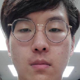

In [10]:
image = np.uint8(face[0]*255)
print(image.shape)
im = Image.fromarray(image)
im

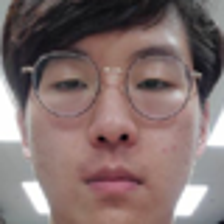

In [11]:
resized = im.resize((224,224))
resized

In [12]:
faces = []
train_left_eye = np.load(train_dir+"face.npy",)
for i_face in train_left_eye:
    image = np.uint8(i_face*255)
    im = Image.fromarray(image)
    resized = im.resize((224,224))
    resized = np.asarray(resized)/255
    faces.append(resized)

faces = np.asarray(faces)
Path(train_dir).mkdir(parents=True, exist_ok=True)
np.save(train_dir+"face_224.npy",faces)